#**I. Importing Required Libraries**

In [110]:
# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# **II. Data Loading**

In [2]:
import shutil
from google.colab import drive
drive.mount('/content/drive')

# Source file path in Google Drive
source_file_path = '/content/drive/MyDrive/Other/Book1.csv'

# Destination directory in Colab
destination_directory = '/content/'

# Use shutil to copy the file
shutil.copy(source_file_path, destination_directory)



Mounted at /content/drive


'/content/Book1.csv'

In [122]:
data = pd.read_csv("/content/Book1.csv")
data

,Duration,ProtocolType,Service,Flag,SrcBytes,DstBytes,Land,WrongFragment,Urgent,Hot,NumFailedLogin,LoggedIn,NumCompromised,RootShell,SuAttempted,NumRoot,NumFile,NumShells,NumAccessFiles,NumOutboundCmds,IsHostLogin,IsGuestLogin,Count,SrvCount,SerrorRate,SrvSerrorRate,RerrorRate,SrvRerrorRate,SameSrvRate,DiffSrvRate,SrvDiffHostRate,DstHostCount,DstHostSrvCount,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostSerrorRate,DstHostSrvSerrorRate,DstHostRerrorRate,DstHostSrvRerrorRate,Attack
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,udp,private,SF,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311025,0,udp,private,SF,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311026,0,udp,private,SF,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311027,0,udp,private,SF,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.


# **III. Exploratory Data Analysis**

In [112]:
# Descriptive statistics
data.describe()

,Duration,SrcBytes,DstBytes,Land,WrongFragment,Urgent,Hot,NumFailedLogin,LoggedIn,NumCompromised,RootShell,SuAttempted,NumRoot,NumFile,NumShells,NumAccessFiles,NumOutboundCmds,IsHostLogin,IsGuestLogin,Count,SrvCount,SerrorRate,SrvSerrorRate,RerrorRate,SrvRerrorRate,SameSrvRate,DiffSrvRate,SrvDiffHostRate,DstHostCount,DstHostSrvCount,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostSerrorRate,DstHostSrvSerrorRate,DstHostRerrorRate,DstHostSrvRerrorRate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.0,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000029,0.000762,0.000051,0.014677,0.002363,0.172476,0.011243,0.000199,0.000023,0.008359,0.000958,0.000084,0.000772,0.0,0.000039,0.002424,269.247019,235.580039,0.059215,0.059193,0.142585,0.142248,0.815654,0.024447,0.025349,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.005379,0.040367,0.009821,0.312068,0.049990,0.377794,1.958325,0.014117,0.005947,2.165196,0.193119,0.012930,0.029453,0.0,0.006211,0.049177,219.834412,239.308028,0.233873,0.234818,0.347564,0.348233,0.371605,0.107061,0.125231,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,17.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,212.000000,126.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
# Calculate descriptive statistics for the dataset
desc_stats = data.describe()
# Identify columns with zero standard deviation
zero_std_columns = desc_stats.columns[desc_stats.loc['std'] == 0.0].tolist()
zero_std_columns

['NumOutboundCmds']

In [124]:
# Determine the datatype of "NumOutboundCmds" column whose standard deviation as demonstrated in the table is zero
# it may standard deviation is a dummy palceholder if this data type is string
data["NumOutboundCmds"].value_counts()

0    311029
Name: NumOutboundCmds, dtype: int64

In [125]:
# Drop columns with zero standard deviation from the dataset
data = data.drop(zero_std_columns, axis=1)

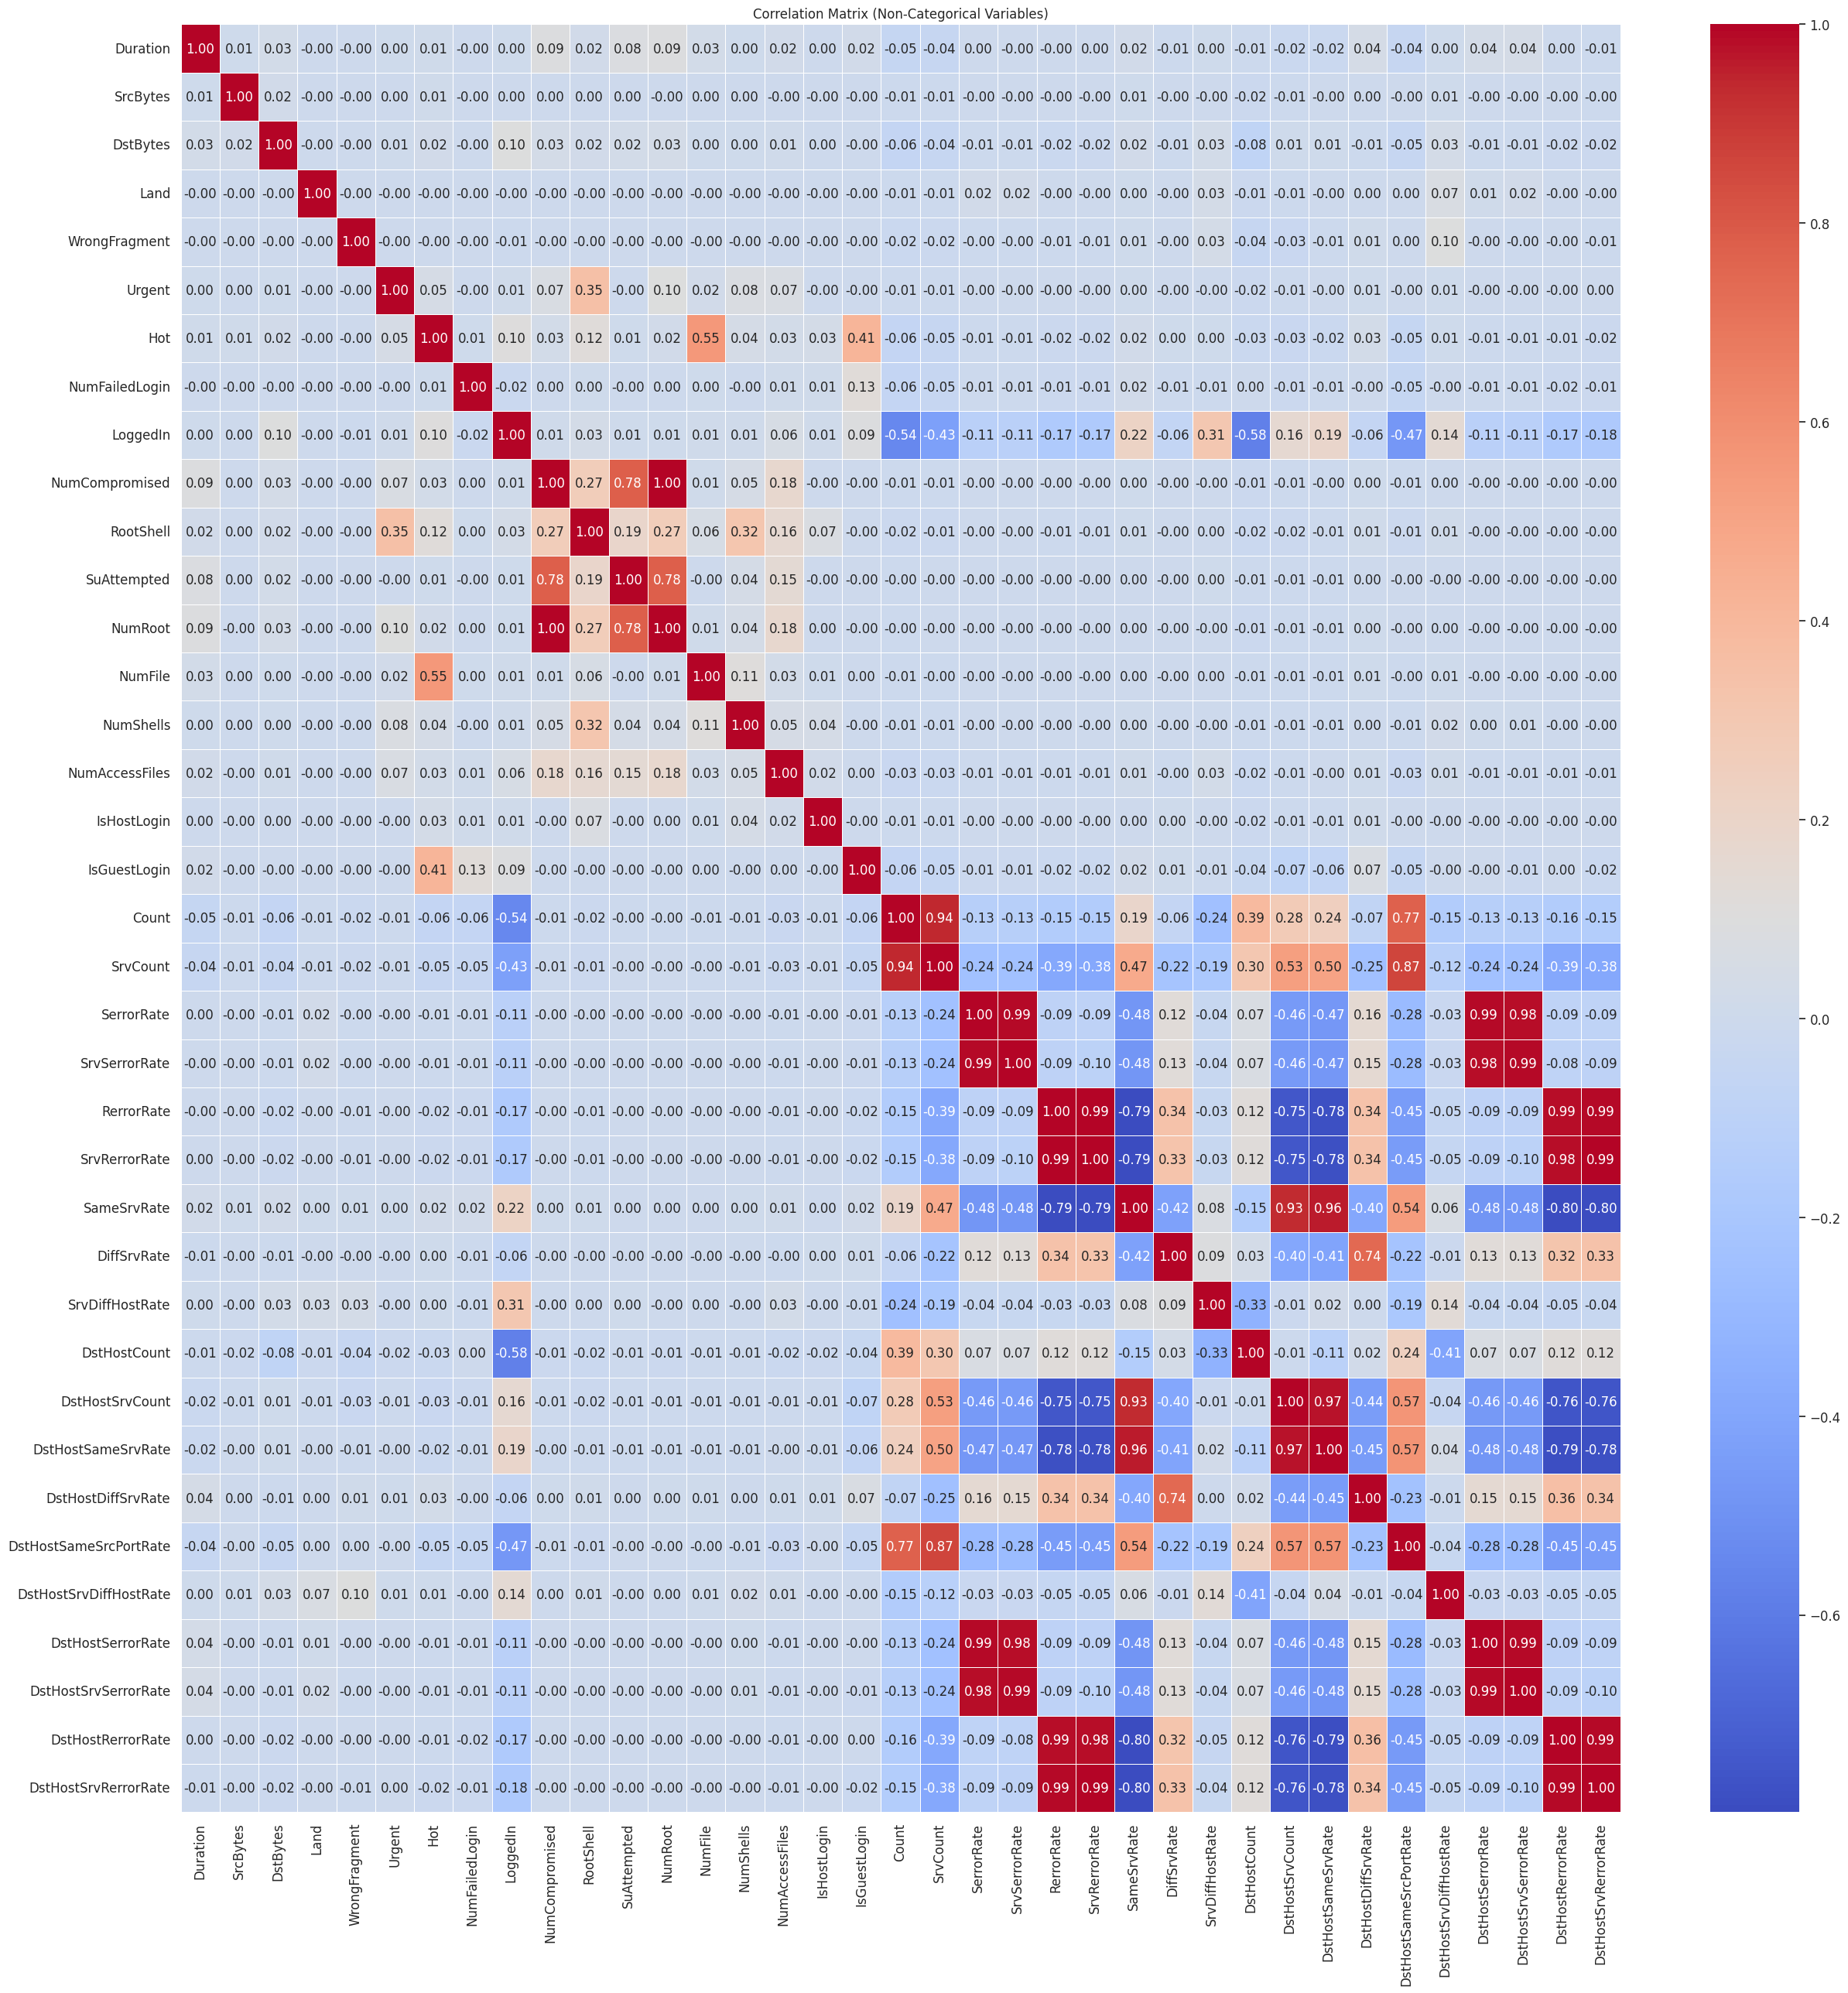

In [126]:
# Compute the correlation matrix between numerical variables
# Identify non-categorical columns
non_categorical_columns = data.select_dtypes(exclude=['object']).columns

# Compute the correlation matrix for non-categorical variables
correlation_matrix = data[non_categorical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 30))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title for the plot
plt.title('Correlation Matrix (Non-Categorical Variables)')

# Display the plot
plt.show()

In [10]:
# Attack Class Distribution
data['Attack'].value_counts()

smurf.              164091
normal.              60593
neptune.             58001
snmpgetattack.        7741
mailbomb.             5000
guess_passwd.         4367
snmpguess.            2406
satan.                1633
warezmaster.          1602
back.                 1098
mscan.                1053
apache2.               794
processtable.          759
saint.                 736
portsweep.             354
ipsweep.               306
httptunnel.            158
pod.                    87
nmap.                   84
buffer_overflow.        22
multihop.               18
named.                  17
sendmail.               17
ps.                     16
rootkit.                13
xterm.                  13
teardrop.               12
xlock.                   9
land.                    9
xsnoop.                  4
ftp_write.               3
loadmodule.              2
perl.                    2
udpstorm.                2
worm.                    2
phf.                     2
sqlattack.               2
i

In [127]:
# Creating a binary class 'Class' based on the 'Attack' column.
# Assigns 0 for 'normal.' and 1 for other values.
data['Class'] = data['Attack'].apply(lambda x: 0 if x == 'normal.' else 1)

# Drop the original 'Attack' column after creating the binary 'Class' column
data.drop('Attack', axis=1, inplace=True)


In [128]:
# Checking Attack Class Distribution After Binary Class Classification
data['Class'].value_counts()

1    250436
0     60593
Name: Class, dtype: int64

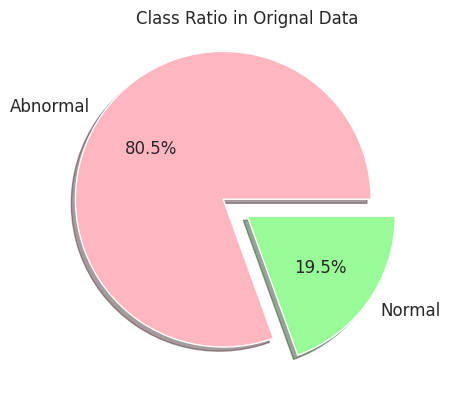

In [13]:
# Store the occurrences of each class in the 'Class' column
y = data['Class'].value_counts()

# Define labels for the pie chart
mylabels = ["Abnormal", "Normal"]

# Define explode values to highlight the 'Abnormal' class
myexplode = [0.2, 0]

# Define colors for the pie chart
colors = ['#FFB6C1', '#98FB98']

# Create a pie chart to visualize the class distribution
plt.pie(y, labels=mylabels, explode=myexplode, colors=colors, shadow=True, autopct='%1.1f%%')

# Set the title of the pie chart
plt.title("Class Ratio in Orignal Data")

# Display the pie chart
plt.show()


In [14]:
# Handling the Missing Value
# Count the number of missing values in each column of the 'data' DataFrame
count = data.isna().sum()

# Print the count of missing values for each column
print(count)


Duration                  0
ProtocolType              0
Service                   0
Flag                      0
SrcBytes                  0
DstBytes                  0
Land                      0
WrongFragment             0
Urgent                    0
Hot                       0
NumFailedLogin            0
LoggedIn                  0
NumCompromised            0
RootShell                 0
SuAttempted               0
NumRoot                   0
NumFile                   0
NumShells                 0
NumAccessFiles            0
IsHostLogin               0
IsGuestLogin              0
Count                     0
SrvCount                  0
SerrorRate                0
SrvSerrorRate             0
RerrorRate                0
SrvRerrorRate             0
SameSrvRate               0
DiffSrvRate               0
SrvDiffHostRate           0
DstHostCount              0
DstHostSrvCount           0
DstHostSameSrvRate        0
DstHostDiffSrvRate        0
DstHostSameSrcPortRate    0
DstHostSrvDiffHostRa

##**IV. Data Split**

###**4.1 Encoding the features Names before Performing Splitting**

In [129]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
for column in ['ProtocolType', 'Service', 'Flag']:
    data[column] = label_encoder.fit_transform(data[column])

# Display the first few rows of the data with label encoding
print(data.head())

   Duration  ProtocolType  Service  Flag  SrcBytes  DstBytes  Land  \
0         0             2       46     9       105       146     0   
1         0             2       46     9       105       146     0   
2         0             2       46     9       105       146     0   
3         0             2       46     9       105       146     0   
4         0             2       46     9       105       146     0   

   WrongFragment  Urgent  Hot  NumFailedLogin  LoggedIn  NumCompromised  \
0              0       0    0               0         0               0   
1              0       0    0               0         0               0   
2              0       0    0               0         0               0   
3              0       0    0               0         0               0   
4              0       0    0               0         0               0   

   RootShell  SuAttempted  NumRoot  NumFile  NumShells  NumAccessFiles  \
0          0            0        0        0          0

##**4.2 Splitting data Using Stratified Sampling for Training, Validation, and Test Sets**

In [130]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data.drop(['Class'], axis=1)
y = data['Class']

# Split the data into training and testing sets with stratified sampling
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Further split the temporary data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (217720, 40) (217720,)
Validation set shape: (46654, 40) (46654,)
Testing set shape: (46655, 40) (46655,)


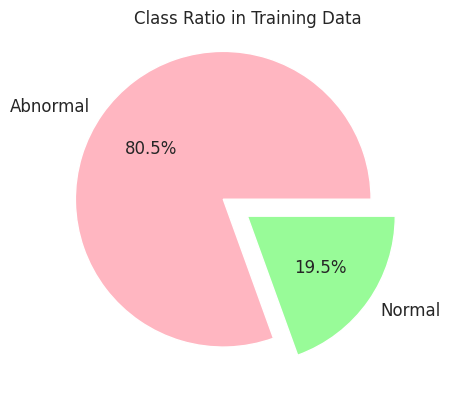

In [17]:
# Visualize the distribution of 'y_train' using a pie chart
import matplotlib.pyplot as plt
y_train_distribution = y_train.value_counts()
labels = ["Abnormal", "Normal"]
colors = ['#FFB6C1', '#98FB98']

plt.pie(y_train_distribution, labels=labels, colors=colors, autopct='%1.1f%%', explode=(0.2, 0))
plt.title("Class Ratio in Training Data")
plt.show()

##**4.3 Handling Training Data Imbalance**


In [131]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define the desired ratio for oversampling and undersampling
sampling_ratio = 0.8

# Create the imbalanced pipeline
imbalanced_pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy=sampling_ratio, random_state=42)),
    ('undersample', RandomUnderSampler(sampling_strategy=sampling_ratio, random_state=42))
])

# Fit and transform the training data using the pipeline
X_train_resampled, y_train_resampled = imbalanced_pipeline.fit_resample(X_train, y_train)

# Display the shape of the resampled training data
print("Shape of resampled training data:", X_train_resampled.shape, y_train_resampled.shape)


Shape of resampled training data: (315549, 40) (315549,)


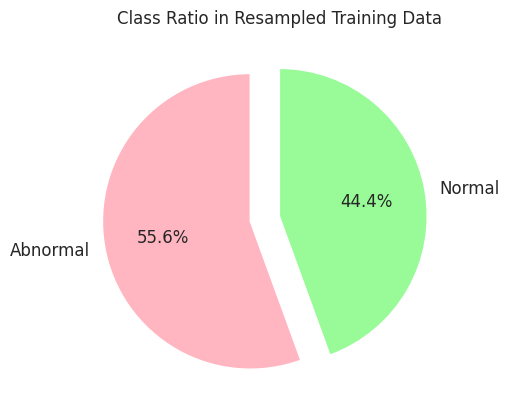

In [19]:
# Visualize the distribution of 'y_train_resampled' using a pie chart

y_train_distribution = y_train_resampled.value_counts()
labels = ["Abnormal", "Normal"]
colors = ['#FFB6C1', '#98FB98']

plt.pie(y_train_distribution, labels=labels, colors=colors, autopct='%1.1f%%', explode=(0.2, 0), startangle=90)
plt.title("Class Ratio in Resampled Training Data")
plt.show()


##**4.4 Normalizing Training, Validation, and Testing Set**


In [132]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the resampled training data
X_train_normalized = scaler.fit_transform(X_train_resampled)

print(X_train_normalized.shape)

# Transform the validation and testing data using the same scaler
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)




(315549, 40)


In [21]:
print(X_val_normalized.shape)
print(X_test_normalized.shape)

(46654, 40)
(46655, 40)


##**V. Training**

getting data subset to train on


In [133]:

# Split the data into smaller subset
X_train, _, y_train, _= train_test_split(X_train_normalized, y_train_resampled, test_size=0.8, stratify=y_train_resampled, random_state=42)
X_val, _, y_val, _= train_test_split(X_val_normalized, y_val, test_size=0.8, stratify=y_val, random_state=42)
X_test, _, y_test, _= train_test_split(X_test_normalized, y_test, test_size=0.8, stratify=y_test, random_state=42)




In [43]:
X_train.shape

(63109, 40)

base line performance


In [47]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [68]:
# Define the pipeline with PCA and RandomForestClassifier
pipeline = Pipeline([
    ('pca', PCA()),
    ('rf', RandomForestClassifier())
])

# Define the hyperparameter grid to search
param_grid = {
    'pca__n_components': np.arange(1, X_train.shape[1] + 1),  # Explore different numbers of components
    'rf__n_estimators': [50],  # Adjust as needed
    'rf__max_depth': [10],  # Adjust as needed
    # Add other RandomForestClassifier hyperparameters as needed
}

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best PCA components
best_pca_components = grid_search.best_params_['pca__n_components']

# Apply PCA with the best components
best_pca = PCA(n_components=best_pca_components)
principalComponents = best_pca.fit_transform(X_train)

# Now you can use principalComponents for further analysis or modeling

Best Hyperparameters: {'pca__n_components': 40, 'rf__max_depth': 10, 'rf__n_estimators': 50}


In [95]:
principalComponents = best_pca.fit_transform(X_train)


In [96]:

principalComponents.shape

(63109, 40)

In [97]:
baseline_model = RandomForestClassifier()

In [98]:
baseline_model.fit(principalComponents, y_train)

RandomForestClassifier()

In [134]:
pca_val = best_pca.transform(X_val)
pca_test = best_pca.transform(X_test)

In [102]:
baseline_model

RandomForestClassifier()

In [103]:
# !pip install dill
# import dill

# # Save all variables to a file
# with open('/content/colab_variables.pkl', 'wb') as file:
#     dill.dump_session(file)


In [135]:
from sklearn.metrics import f1_score

# Assuming rf_model is your trained Random Forest model
rf_preds = baseline_model.predict(pca_test)

# Assuming y_test contains the true labels for the test set
rf_f1 = f1_score(y_test, rf_preds, average='macro')

print("Random Forest F1 Score:", rf_f1)


Random Forest F1 Score: 0.9606491269892392


###4.4.1 Feature Selection Using Xgboost

    Number of Features  Mean Test F1 Score  Std Test F1 Score
0                    1            0.928408           0.002887
1                    2            0.966537           0.002472
2                    3            0.968145           0.002682
3                    4            0.969277           0.002960
4                    5            0.970923           0.002816
5                    6            0.971943           0.003048
6                    7            0.975644           0.003969
7                    8            0.977623           0.002240
8                    9            0.978821           0.002359
9                   10            0.979348           0.002615
10                  11            0.979733           0.002265
11                  12            0.980771           0.001408
12                  13            0.980883           0.001432
13                  14            0.980867           0.001511
14                  15            0.980883           0.001528
15      

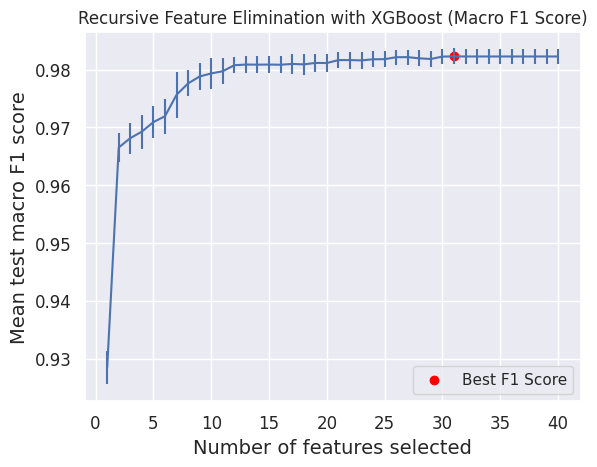

40

In [142]:
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import numpy as np
import panda                                                                                                                                s as pd

# Define the XGBClassifier
clf = XGBClassifier()

# Initialize the RFECV with macro F1 score as the scoring metric
rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=StratifiedKFold(5),
    scoring="f1_macro",  # Use macro F1 score as the scoring metric
    n_jobs=1,
)
# Fit the RFECV on the training data
rfecv.fit(X_train, y_train)
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Number of Features': range(1, len(rfecv.support_) + 1),
    'Mean Test F1 Score': rfecv.cv_results_["mean_test_score"],
    'Std Test F1 Score': rfecv.cv_results_["std_test_score"]
})


# Print the results table
print(results_df)
# Find the index of the maximum mean test F1 score
best_f1_index = np.argmax(rfecv.cv_results_["mean_test_score"])

# Select the optimal number of features based on the best F1 score
optimal_num_features = range(1, len(rfecv.support_) + 1)[best_f1_index]

# Display the optimal number of features and the corresponding F1 score
print(f"\nOptimal number of features: {optimal_num_features}")
print(f"Best mean test macro F1 score: {rfecv.cv_results_['mean_test_score'][best_f1_index]}")

# Visualize the results
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test macro F1 score")
plt.errorbar(
    range(1, len(rfecv.support_) + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.scatter(optimal_num_features, rfecv.cv_results_['mean_test_score'][best_f1_index], color='red', marker='o', label='Best F1 Score')
plt.title("Recursive Feature Elimination with XGBoost (Macro F1 Score)")
plt.legend()
plt.show()
myxg_features = X_train[:, rfecv.support_]
len(rfecv.support_)

Applying different models


In [138]:
myxg_features = X_train[:, rfecv.support_]


In [145]:
myxg_features_val = X_val[:, rfecv.support_]
myxg_features_test = X_test[:, rfecv.support_]


###SVM

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# 1. Hyperparameter tuning for SVM
svm_param_grid = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': ['scale', 'auto']}

svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='f1')
svm_grid_search.fit(myxg_features, y_train)
best_svm_model = svm_grid_search.best_estimator_

In [169]:
best_svm_f1 = f1_score(y_val, best_svm_model.predict(X_val[:, rfecv.support_]))

print("Best SVM Parameters:", svm_grid_search.best_params_)
print("Best SVM F1 Score:", best_svm_f1)


Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best SVM F1 Score: 0.9786858539234321


In [148]:
myxg_features.shape

(63109, 31)

###SVM2

In [173]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Assuming you have the training and validation sets: X_train, X_val, y_train, y_val
# Split your data into training and validation sets if not done already
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Support Vector Machine
svm_param_grid = {
    'C': [10, 15, 20],
    'kernel': ['poly'],
    'gamma': ['scale']
}

# Create an instance of the Support Vector Machine model with probability=True
svm_model = SVC(random_state=42, probability=True)

# Use GridSearchCV with the custom scorer
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='f1_macro')

# Fit the grid search to your data
svm_grid_search.fit(myxg_features, y_train)

# Get the best parameters and best model
best_svm_model = svm_grid_search.best_estimator_

# Now you can use the best Support Vector Machine model for predictions
svm_preds = best_svm_model.predict(X_val[:, rfecv.support_])

# Calculate F1 score with macro averaging
best_svm_f1 = f1_score(y_val, svm_preds, average='macro')

print("Best Support Vector Machine Parameters:", svm_grid_search.best_params_)
print("Best Support Vector Machine F1 Score:", best_svm_f1)


Best Support Vector Machine Parameters: {'C': 20, 'gamma': 'scale', 'kernel': 'poly'}
Best Support Vector Machine F1 Score: 0.9495064180565791


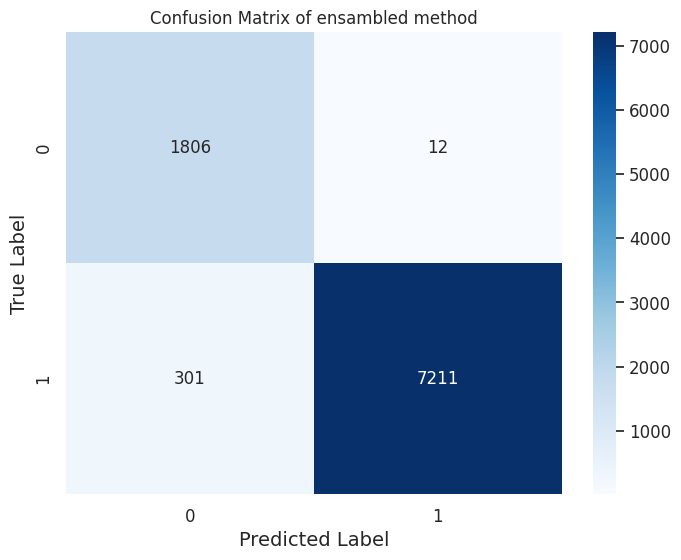

In [180]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val, best_svm_model.predict(X_val[:, rfecv.support_]))

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of ensambled method")
plt.show()

###IForest

In [207]:
from sklearn.utils.class_weight import compute_sample_weight
# 2. Hyperparameter tuning for Isolation Forest
iforest_param_grid = {'n_estimators': [50, 100, 200],
                      'contamination': [0.01, 0.05, 0.1]}


class_weights = {0: 5, 1: 1}

# Calculate sample weights based on class labels
sample_weights = compute_sample_weight(class_weight=class_weights, y=y_train)

iforest_grid_search = GridSearchCV(IsolationForest(random_state=42), iforest_param_grid, cv=5, scoring='f1_macro')
iforest_grid_search.fit(myxg_features, sample_weight=sample_weights)
best_iforest_model = iforest_grid_search.best_estimator_
best_iforest_preds = best_iforest_model.predict(X_val[:, rfecv.support_])
best_iforest_preds[best_iforest_preds == -1] = 0  # Convert 1 to 0 and -1 to 1
best_iforest_f1 = f1_score(y_val, best_iforest_preds ,average='macro')

print("Best Isolation Forest Parameters:", iforest_grid_search.best_params_)
print("Best Isolation Forest F1 Score:", best_iforest_f1)

Best Isolation Forest Parameters: {'contamination': 0.01, 'n_estimators': 50}
Best Isolation Forest F1 Score: 0.4453079555175364


In [201]:
if_preds = best_iforest_model.predict(myxg_features_val)
if_preds = np.where(if_preds == -1, 0, if_preds)

if_f1 = f1_score(y_val, if_preds, average='macro')

print("Isolation Forest F1 Score:", if_f1)


Isolation Forest F1 Score: 0.4453079555175364


In [202]:
np.unique(if_preds)

array([0, 1])

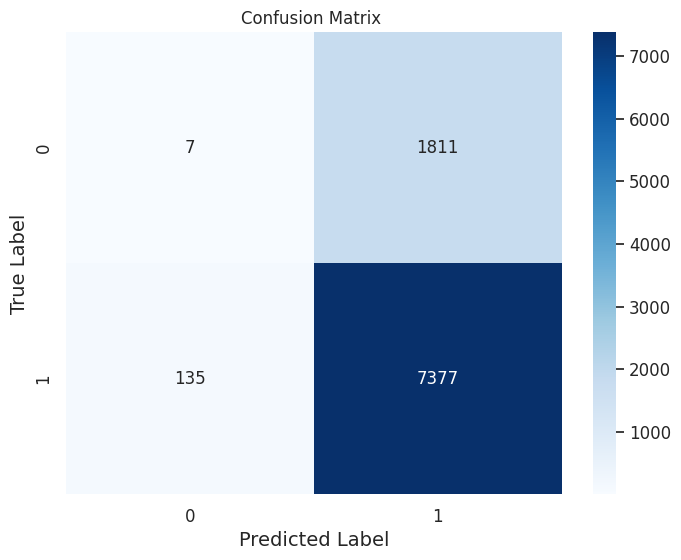

In [210]:
conf_matrix = confusion_matrix(y_val, if_preds)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix ")
plt.show()

###Random forest###

In [152]:


# 3. Hyperparameter tuning for Random Forest
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5],
                 'min_samples_leaf': [1, 2]}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='f1_macro')
rf_grid_search.fit(myxg_features, y_train)
best_rf_model = rf_grid_search.best_estimator_
best_rf_f1 = f1_score(y_val, best_rf_model.predict(X_val[:, rfecv.support_]),average='macro')

print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best Random Forest F1 Score:", best_rf_f1)


Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest F1 Score: 0.9675834944023366


In [154]:
rf_preds = best_rf_model.predict(myxg_features_test)

rf_f1 = f1_score(y_test, rf_preds, average='macro')

print("Random Forest F1 Score:", rf_f1)


Random Forest F1 Score: 0.9627074827356275


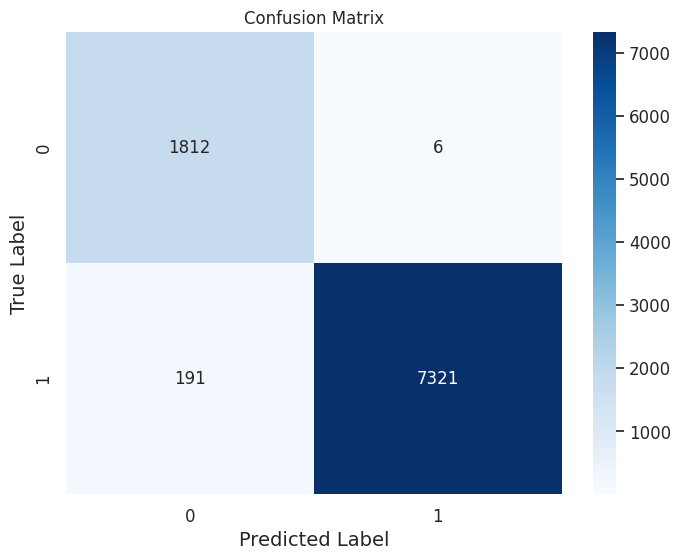

In [209]:
conf_matrix = confusion_matrix(y_val, best_rf_model.predict(X_val[:, rfecv.support_]))

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

###CatBoost

In [ ]:
!pip install catboost


In [157]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

# Define the parameter grid for CatBoost
catboost_param_grid = {'iterations': [50, 100, 200],
                       'depth': [6, 8, 10],
                       'learning_rate': [0.01, 0.05, 0.1]}

# Create an instance of the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=False)

# Use GridSearchCV with the custom scorer
catboost_grid_search = GridSearchCV(catboost_model, catboost_param_grid, cv=5, scoring='f1_macro')

# Fit the grid search to your data
catboost_grid_search.fit(myxg_features, y_train)

# Get the best parameters and best model
best_catboost_model = catboost_grid_search.best_estimator_

# Now you can use the best CatBoost model for predictions
y_pred = best_catboost_model.predict(X_val[:, rfecv.support_])

# Calculate F1 score with macro averaging
best_catboost_f1 = f1_score(y_val, y_pred, average='macro')

print("Best CatBoost Parameters:", catboost_grid_search.best_params_)
print("Best CatBoost F1 Score:", best_catboost_f1)


Best CatBoost Parameters: {'depth': 10, 'iterations': 100, 'learning_rate': 0.1}
Best CatBoost F1 Score: 0.9680709417027702


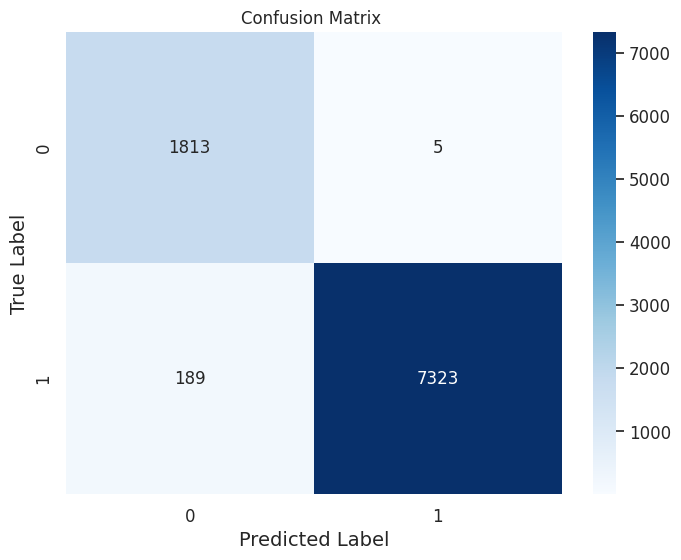

In [216]:
conf_matrix = confusion_matrix(y_val, best_catboost_model.predict(X_val[:, rfecv.support_]))

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix ")
plt.show()

###Naive Bayes

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

# Define the parameter grid for Multinomial Naive Bayes
nb_param_grid = {'alpha': [0.1, 0.5, 1.0]}

# Create an instance of the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Use GridSearchCV with the custom scorer
nb_grid_search = GridSearchCV(nb_model, nb_param_grid, cv=5, scoring='f1_macro')

# Fit the grid search to your data
nb_grid_search.fit(myxg_features, y_train)

# Get the best parameters and best model
best_nb_model = nb_grid_search.best_estimator_

# Now you can use the best Naive Bayes model for predictions
y_pred = best_nb_model.predict(X_val[:, rfecv.support_])

# Calculate F1 score with macro averaging
best_nb_f1 = f1_score(y_val, y_pred, average='macro')

print("Best Naive Bayes Parameters:", nb_grid_search.best_params_)
print("Best Naive Bayes F1 Score:", best_nb_f1)


Best Naive Bayes Parameters: {'alpha': 0.1}
Best Naive Bayes F1 Score: 0.8974126437825226


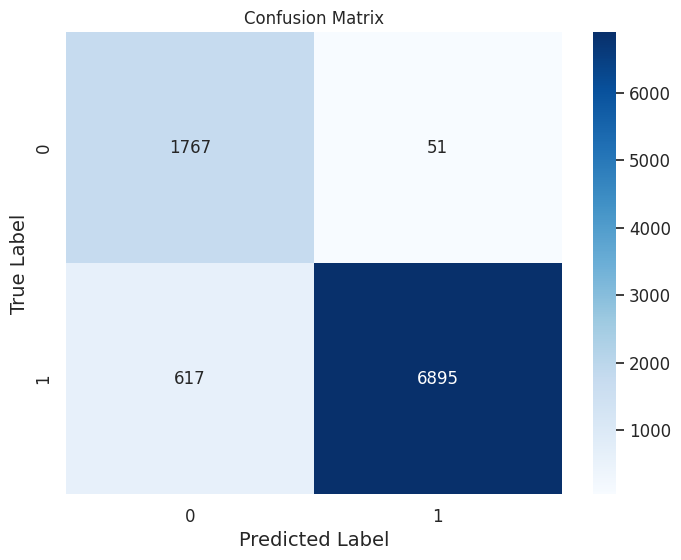

In [215]:
conf_matrix = confusion_matrix(y_val, best_nb_model.predict(X_val[:, rfecv.support_]))

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

###Logistic Regression

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Define the parameter grid for Logistic Regression
logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create an instance of the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Use GridSearchCV with the custom scorer
logreg_grid_search = GridSearchCV(logreg_model, logreg_param_grid, cv=5, scoring='f1_macro')

# Fit the grid search to your data
logreg_grid_search.fit(myxg_features, y_train)

# Get the best parameters and best model
best_logreg_model = logreg_grid_search.best_estimator_

# Now you can use the best Logistic Regression model for predictions
y_pred = best_logreg_model.predict(X_val[:, rfecv.support_])

# Calculate F1 score with macro averaging
best_logreg_f1 = f1_score(y_val, y_pred, average='macro')

print("Best Logistic Regression Parameters:", logreg_grid_search.best_params_)
print("Best Logistic Regression F1 Score:", best_logreg_f1)


Best Logistic Regression Parameters: {'C': 100}
Best Logistic Regression F1 Score: 0.9353322223892226


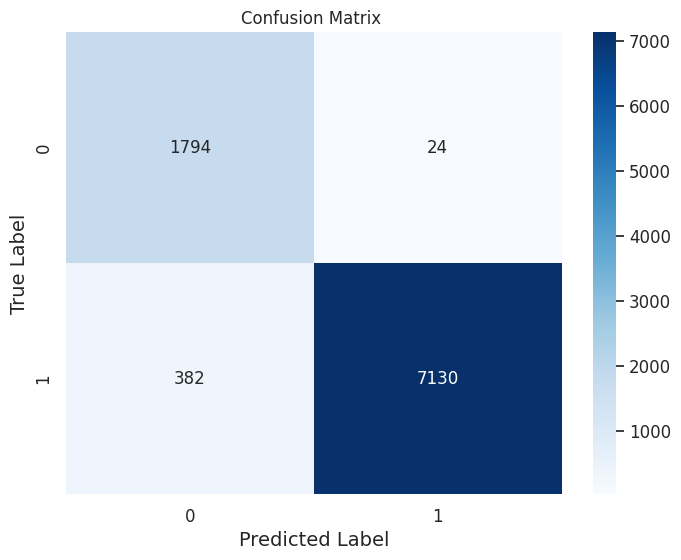

In [217]:
conf_matrix = confusion_matrix(y_val, best_logreg_model.predict(X_val[:, rfecv.support_]))

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix ")
plt.show()

###Gradient Boost

In [160]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(myxg_features, y_train)

# Make predictions on the validation set
gb_preds = gb_model.predict(X_val[:, rfecv.support_])

# Calculate F1 score with macro averaging
gb_f1 = f1_score(y_val, gb_preds, average='macro')

print("Gradient Boosting F1 Score:", gb_f1)


Gradient Boosting F1 Score: 0.9627207612504531


In [161]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Assuming you have the training and validation sets: X_train, X_val, y_train, y_val
# Split your data into training and validation sets if not done already
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create an instance of the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=42)

# Use GridSearchCV with the custom scorer
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='f1_macro')

# Fit the grid search to your data
gb_grid_search.fit(myxg_features, y_train)

# Get the best parameters and best model
best_gb_model = gb_grid_search.best_estimator_

# Now you can use the best Gradient Boosting model for predictions
gb_preds = best_gb_model.predict(X_val[:, rfecv.support_])

# Calculate F1 score with macro averaging
best_gb_f1 = f1_score(y_val, gb_preds, average='macro')

print("Best Gradient Boosting Parameters:", gb_grid_search.best_params_)
print("Best Gradient Boosting F1 Score:", best_gb_f1)


Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best Gradient Boosting F1 Score: 0.9679001183162099


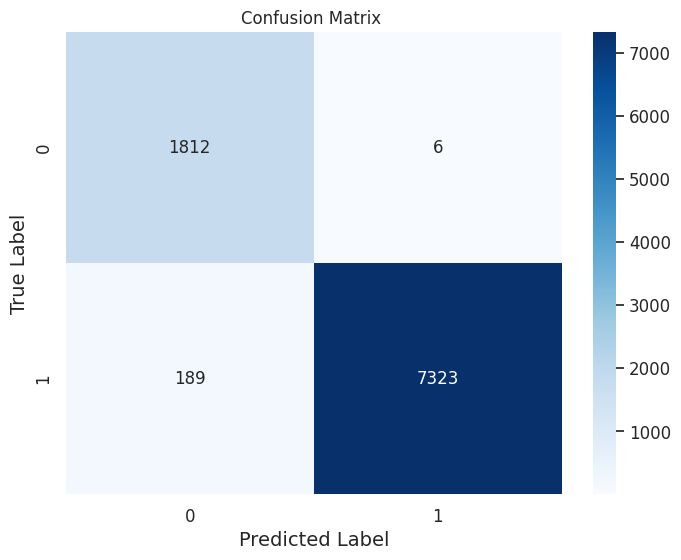

In [218]:
conf_matrix = confusion_matrix(y_val, best_gb_model.predict(X_val[:, rfecv.support_]))

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix ")
plt.show()

In [ ]:
# sklearn.metrics.get_scorer_names()

###KNN

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Assuming you have the training and validation sets: X_train, X_val, y_train, y_val
# Split your data into training and validation sets if not done already
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create an instance of the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Use GridSearchCV with the custom scorer
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='f1_macro')

# Fit the grid search to your data
knn_grid_search.fit(myxg_features, y_train)

# Get the best parameters and best model
best_knn_model = knn_grid_search.best_estimator_

# Now you can use the best K-Nearest Neighbors model for predictions
knn_preds = best_knn_model.predict(X_val[:, rfecv.support_])

# Calculate F1 score with macro averaging
best_knn_f1 = f1_score(y_val, knn_preds, average='macro')

print("Best K-Nearest Neighbors Parameters:", knn_grid_search.best_params_)
print("Best K-Nearest Neighbors F1 Score:", best_knn_f1)


Best K-Nearest Neighbors Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best K-Nearest Neighbors F1 Score: 0.9669969331555247


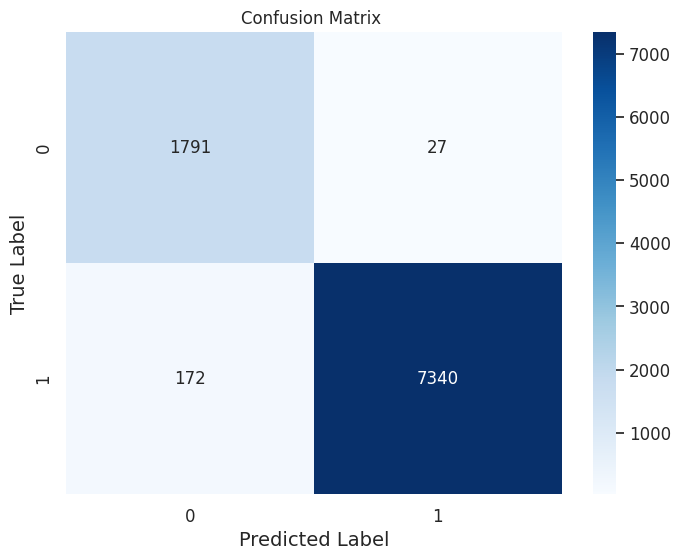

In [219]:
conf_matrix = confusion_matrix(y_val, best_knn_model.predict(X_val[:, rfecv.support_]))

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix ")
plt.show()

###XGboost

In [163]:
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Assuming you have the training and validation sets: X_train, X_val, y_train, y_val
# Split your data into training and validation sets if not done already
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create an instance of the XGBoost Classifier model
xgb_model = xgb.XGBClassifier(random_state=42)

# Use GridSearchCV with the custom scorer
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='f1_macro')

# Fit the grid search to your data
xgb_grid_search.fit(myxg_features, y_train)

# Get the best parameters and best model
best_xgb_model = xgb_grid_search.best_estimator_

# Now you can use the best XGBoost model for predictions
xgb_preds = best_xgb_model.predict(X_val[:, rfecv.support_])

# Calculate F1 score with macro averaging
best_xgb_f1 = f1_score(y_val, xgb_preds, average='macro')

print("Best XGBoost Parameters:", xgb_grid_search.best_params_)
print("Best XGBoost F1 Score:", best_xgb_f1)


Best XGBoost Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best XGBoost F1 Score: 0.9679125959820083


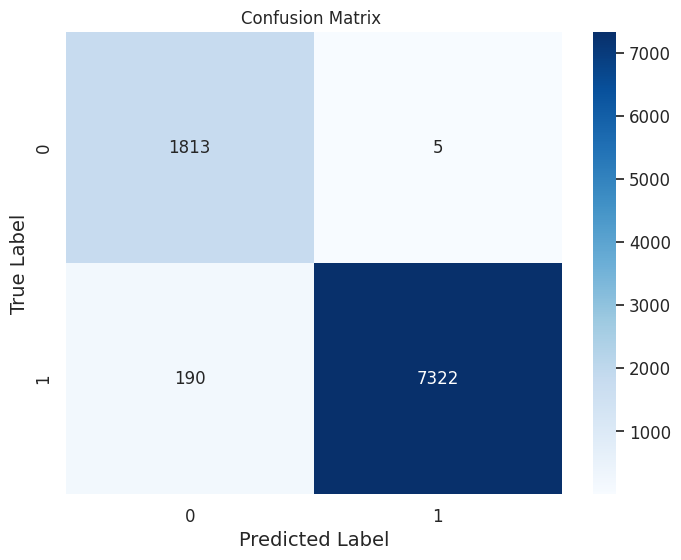

In [220]:
conf_matrix = confusion_matrix(y_val, best_xgb_model.predict(X_val[:, rfecv.support_]))

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix ")
plt.show()

##Ensembling

In [171]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score

# Create a Voting Classifier ensemble
ensemble_model = VotingClassifier(
    estimators=[
        ('gb', best_gb_model),
        ('rf', best_rf_model),
        ('SVM', best_svm_model),
        ('catboost', best_catboost_model),
        ('kmm', best_knn_model)
    ],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting
)

# Fit the ensemble model to the training data
ensemble_model.fit(myxg_features, y_train)

# Make predictions on the validation set
ensemble_preds = ensemble_model.predict(X_val[:, rfecv.support_])

# Calculate F1 score with macro averaging for the ensemble
ensemble_f1 = f1_score(y_val, ensemble_preds, average='macro')

print("Ensemble F1 Score:", ensemble_f1)


Ensemble F1 Score: 0.9679001183162099


In [174]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score

# Create a Voting Classifier ensemble
ensemble_model = VotingClassifier(
    estimators=[
        ('gb', best_gb_model),
        ('rf', best_rf_model),
        ('catboost', best_catboost_model),
        ('SVM', best_svm_model),
        ('knn', best_knn_model)
    ],
    voting='soft'  # 'hard' for majority voting, 'soft' for weighted voting
)

# Fit the ensemble model to the training data
ensemble_model.fit(myxg_features, y_train)

# Make predictions on the validation set
ensemble_preds = ensemble_model.predict(X_val[:, rfecv.support_])

# Calculate F1 score with macro averaging for the ensemble
ensemble_f1 = f1_score(y_val, ensemble_preds, average='macro')

print("Ensemble F1 Score:", ensemble_f1)

Ensemble F1 Score: 0.9669893797910114


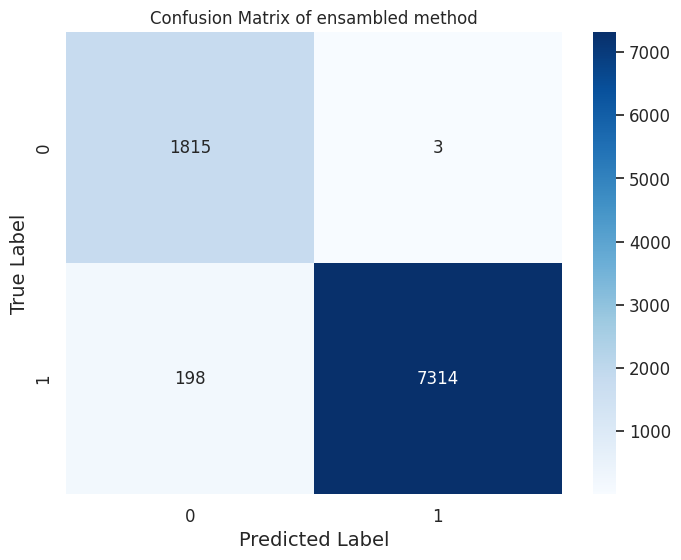

In [221]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val, ensemble_preds)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of ensambled method")
plt.show()